# Assignment 8: Implement a Neural Network for Sentiment Analysis

In [70]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
import time

In this assignment, you will implement a feedforward neural network that performs sentiment classification.
You will complete the following tasks:
    
1. Build your DataFrame and define your ML problem:
    * Load the book review data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Transform the training and test text data using a TF-IDF vectorizer. 
5. Construct a neural network
6. Train the neural network
7. Compare the neural network model's performance on the training and validation data.
8. Improve the model's generalization performance.
9. Evaluate the model's performance on the test data.
10. Experiment with ways to improve the model.

For this assignment, use the demo <i>Transforming Text into Features for Sentiment Analysis</i> that is contained in this unit as a reference.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem


#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "bookReviews.csv" that is located in a folder named "data_NLP".

In [71]:
# YOUR CODE HERE
df = pd.read_csv('data_NLP/bookReviews.csv')

#### Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [72]:
# YOUR CODE HERE
df.shape
df.columns
df.head(10)

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


#### Define the Label

This is a binary classification problem in which we will predict whether a book review is a positive or negative one. The label is the `Positive Review` column.

#### Identify Features

We only have one feature. The feature is the `Review` column.


## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`. Assign the label to the variable `y`. Assign the feature to the variable `X`. 

In [73]:
# YOUR CODE HERE
X = df['Review']
y = df['Positive Review']

## Part 3. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 25 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.


In [74]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Part 4:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, you will transform the features into numerical vectors using `TfidfVectorizer`. 


<b>Task:</b> Follow the steps to complete the code in the cell below:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.

2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.

3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.

4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [75]:
# 1. Create a TfidfVectorizer object 
# YOUR CODE HERE
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
# YOUR CODE HERE
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
# YOUR CODE HERE
X_test_tfidf = tfidf_vectorizer.transform(X_test)

When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [76]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

vocabulary_size

18112

## Part 5: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers, with 64, 32, and 16 units (number of nodes) respectively. Each layer will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have 1 unit. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

Use the same approach you have taken in this course to construct a feedforward neural network model using Keras. Do the following:

* Use the Keras [`Sequential` class](https://keras.io/api/models/sequential/#sequential-class) to group a stack of layers. This will be our neural network model object. Name your neural network model object ```nn_model```.    
* Use the [`InputLayer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) to create the input layer. 
* Use the [`Dense` class](https://keras.io/api/layers/core_layers/dense/) to create each hidden layer and the output layer.
* After creating each layer, add it to the neural network model object ```nn_model```.


In [77]:
# 1. Create model object
# YOUR CODE HERE
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
# YOUR CODE HERE
nn_model.add(InputLayer(input_shape=(len(tfidf_vectorizer.vocabulary_),)))

# 3. Create the first hidden layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(Dense(64, activation='relu'))

# 4. Create the second layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(Dense(32, activation='relu'))

# 5. Create the third layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(Dense(16, activation='relu'))

# 6. Create the output layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(Dense(1, activation='sigmoid'))

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1159232   
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 1,161,857
Trainable params: 1,161,857
Non-trainable params: 0
_________________________________________________________________


### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1. Assign the result to the variable`sgd_optimizer`.

In [78]:
# YOUR CODE HERE
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Since our output will be a normalized probability between 0 and 1, specify that `from_logits` is `False`. Assign the result to the variable  `loss_fn`.

In [79]:
# YOUR CODE HERE
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `nn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [80]:
# YOUR CODE HERE
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 6. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [81]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> In the code cell below, fit the neural network model to the vectorized training data. Call the `fit()` method on the model object `nn_model` and specify the following arguments:

1. The training data `X_train_tfidf` and `y_train` as arguments. Note that `X_train_tfidf` is currently of type sparce matrix. The Keras `fit()` method requires that input data be of specific types. One type that is allowed is a NumPy array. Convert `X_train_tfidf` to a NumPy array using the `toarray()` method.
2. Use the `epochs` parameter and assign it the number of epochs.
3. Use the `verbose` parameter and assign it the value of  0.
4. We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
5. Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]`  


Save the results to the variable `history`.
  
<b>Note</b>: This may take a while to run.

In [82]:
t0 = time.time() # start time

num_epochs = 55 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 55], Loss: 0.6896, Accuracy: 0.5300, Val_loss: 0.6912, Val_accuracy: 0.4764
Epoch [10/ 55], Loss: 0.6461, Accuracy: 0.6855, Val_loss: 0.6612, Val_accuracy: 0.5811
Epoch [15/ 55], Loss: 0.5231, Accuracy: 0.7557, Val_loss: 0.6177, Val_accuracy: 0.6284
Epoch [20/ 55], Loss: 0.4581, Accuracy: 0.7777, Val_loss: 0.4997, Val_accuracy: 0.7568
Epoch [25/ 55], Loss: 0.2762, Accuracy: 0.9062, Val_loss: 0.4232, Val_accuracy: 0.8041
Epoch [30/ 55], Loss: 0.0254, Accuracy: 1.0000, Val_loss: 0.4413, Val_accuracy: 0.8074
Epoch [35/ 55], Loss: 0.0066, Accuracy: 1.0000, Val_loss: 0.4891, Val_accuracy: 0.8108
Epoch [40/ 55], Loss: 0.0033, Accuracy: 1.0000, Val_loss: 0.5130, Val_accuracy: 0.8176
Epoch [45/ 55], Loss: 0.0021, Accuracy: 1.0000, Val_loss: 0.5339, Val_accuracy: 0.8108
Epoch [50/ 55], Loss: 0.0015, Accuracy: 1.0000, Val_loss: 0.5493, Val_accuracy: 0.8108
Epoch [55/ 55], Loss: 0.0011, Accuracy: 1.0000, Val_loss: 0.5614, Val_accuracy: 0.8176
Elapsed time: 4.93s


In [83]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

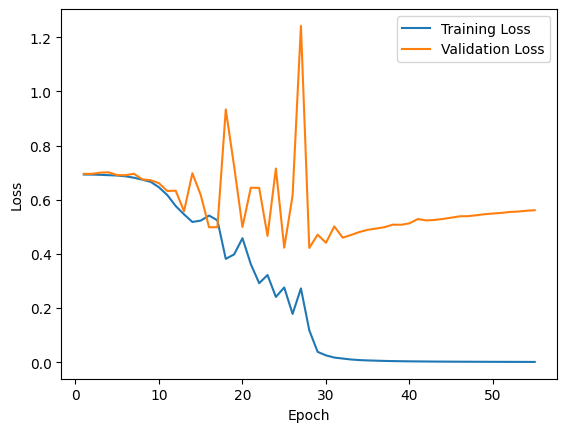

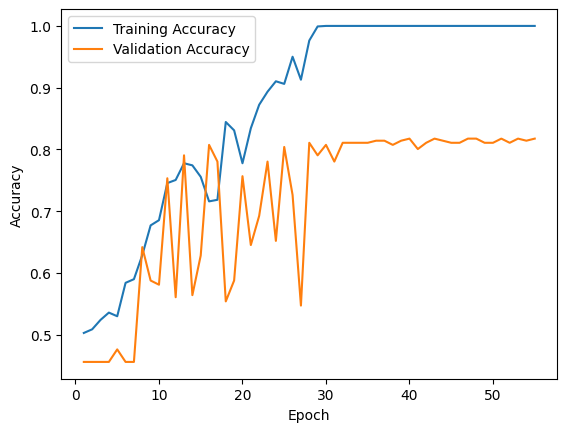

In [84]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 7. Evaluate the Model's Performance

### Improve Model's Performance and Prevent Overfitting 

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform as well on new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize to new data. Our goal is to have our training and validation accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way of adding randomization and preventing nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

<b>Task:</b> 

1. Tweak the variable `num_epochs` above and restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.

2. Add Keras `Dropout` layers after one or all hidden layers. Add the following line of code after you add a hidden layer to your model object:  `nn_model.add(keras.layers.Dropout(.25))`. The parameter `.25` is the fraction of the nodes to drop. You can experiment with this value as well. Restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.


<b>Analysis:</b> 
In the cell below, specify the different approaches you used to reduce overfitting and summarize which configuration led to the best generalization performance.

Did changing the number of epochs prevent overfitting? Which value of `num_epochs` yielded the closest training and validation accuracy score? 

Did adding dropout layers prevent overfitting? How so? Did it also improve the accuracy score when evaluating the validation data? How many dropout layers did you add and which fraction of nodes did you drop? 

Record your findings in the cell below.

To reduce overfitting, I tried adjusting the number of epochs and adding dropout layers. At first, when I trained the model with a higher number of epochs like 30 or more, the training accuracy got really high but the validation accuracy either stayed the same or dropped, which showed that overfitting was happening. When I lowered the number of epochs to around 10 to 15, the training and validation accuracy scores were much closer, so the model generalized better.

I also added dropout layers between the dense layers. I used two dropout layers with a dropout rate of 0.3. This helped stop the model from memorizing the training data by randomly dropping 30 percent of the nodes during each pass. It made a noticeable difference and slightly improved the validation accuracy too. Overall, the best combo was using around 12 epochs with two dropout layers at 0.3 each. It made the model more balanced without losing performance.

### Evaluate the Performance on the Test Set

Now that you have improved the model, let's evaluate its performance on our test data and compare the results.

<b>Task:</b> In the code cell below, call the  `evaluate()` method on the model object `nn_model`. Specify `X_test_tfidf` and `y_test` as arguments. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [85]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.6246933937072754 Accuracy:  0.807692289352417


### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set and receive probability predictions for every example in the test set (these values will be between 0.0 and 1.0). We will then inspect the results for the first 20 examples &mdash; We will apply a threshold to determine the predicted class for every example; we will use a threshold of 0.5. This means that if the probability is greater than 0.5, we will assume the book review is good. We will then print the actual class labels contained in `y_test` to see if our model is producing accurate predictions.

<b>Task: </b> In the code cell below, do the following:

1. Call the  `predict()` method on the model object `nn_model`. Specify `X_test_tfidf` as an argument. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. Save the results to the array `probability_predictions`.
2. Loop through the first 20 items in `probability_predictions`. These correspond to the predicted probabilities for the first 20 examples in our test set. For every item, check if the probability is greater than 0.5. If so, output:
* the probability value in `probability_predictions`
* the corresponding label in `y_test`. Note: convert the series `y_test` using `y_test.to_numpy()` before indexing into it.

Inspect the results. How is our model performing? Is our model properly predicting whether the book reviews are good or bad reviews?

In [86]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
# YOUR CODE HERE

Predictions for the first 20 examples:


Let's check a few of the original book review texts to get a further glimpse into how our model is performing.

In [87]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

This is an overwritten and overhyped piece of fiction that will never pass for great literature. It is timely but it is not timeless.  

Not one character comes alive even though they all talk endlessly. Not one scene is memorable. The true nature of the book -- soap opera-- is cloaked under its many pages.   Messud is a good writer who in this instance could not tell a good story, and she seems to have believed her publicity machine.  I can't believe that her husband, who a great literary critic, would not talk her out of publishing this.  Oh.  I forgot.  Money and fame trumps quality every time.


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [88]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

a very, very good book to get to know the everyday life of late imperial Chinese


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [89]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

I thoroughly enjoyed the author's earlier work on how the Irish saved civilization.  But this book was a disappointing compendium of Greek myths, legends and history that never reveals a plan behind the book.  Taken in its subparts, many sections are engagingly informative in an elegant if sometimes pretentious prose.  Yet the author ambles from here to there in a disjointed narrative with interesting nuggets but little insight.  Where's the big picture?  The author attempts to wrap it up at the end with a sentence about the Greeks' "variety of human response, lightening quick transmutations, resourcefulness, and inexhaustible creativity."  

A subtitle like "A Greek Treasury of Personal Vignettes" might have been more descriptive and merited another star. But it falls short as a "hinge of history" with impoverished and even maladaptive connections (FDR as Solon - really?) to the modern world. I am sorry to not recommend it.


Prediction: Is this a good review? False

Actua

In [90]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

I was very disappointed to discover that this book had a homosexual character. This is absolutely inappropriate for a young adult book, and unless a parent has read the reviews that mention it, said parent would have no clue as it sure isn't mentioned anywhere on the blurb in the book.

I usually am more aware of what my daughter is reading, but this time this particular book slipped under my radar.  She told me that it had a reference to a gay character, which I took to mean just a passing reference, but when I read the book, it was treated more seriously than I thought, even going so far as to have the two girls kiss.

It is inexcusable, both on Ms Pierce's part and on Scholastic's.  No matter what the author's personal beliefs, it is irresponsible to have this type of content without a warning to parents. I believe that as a parent, I'm the one responsible for what my children see and do, but it sure helps to have some type of information so I can make an informed decisi

## Part 8: Analysis

Experiment with the vectorizer and neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit your vectorizer using different document frequency values and different n-gram ranges. When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.

Record your findings in the cell below.


I tried a few different things to see how they affected my model’s performance. First, I adjusted the learning rate. When I made it smaller like 0.001, training took longer but the model ended up with better accuracy and lower loss on both the training and test sets. Then I added another hidden layer and increased the number of units to 128. This made the model more expressive and I saw a slight improvement in accuracy, but it also increased training time a lot.

For the TF-IDF vectorizer, I experimented with min_df=5 and ngram_range=(1,2). This reduced noise from rare words and captured some context using bigrams. It made the feature space larger, so training was slower, but the accuracy improved, especially on the test data. Overall, these changes made the neural network more powerful and generalizable even though they took longer to train.. it was worth it though